In [ ]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!git clone https://github.com/ajulissa/CovidPredict.git

Cloning into 'CovidPredict'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 49 (delta 20), reused 25 (delta 9), pack-reused 0
Unpacking objects: 100% (49/49), done.


In [ ]:
%cd CovidPredict

/content/CovidPredict/CovidPredict/CovidPredict


In [ ]:
!unzip covidTested_v0083.zip

Archive:  covidTested_v0083.zip
  inflating: covidTested_v0083.csv   


In [ ]:
!ls

check_transparente.png
Covid.ipynb
covidTested_v0083.csv
covidTested_v0083.zip
estilos.css
funciones.js
index.html
README.md
transparent-check-icon-5db805b5b53aa6.4845664315723411737423.png


In [ ]:
df0083 = pd.read_csv('./covidTested_v0083.csv')
df0083

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,fecha,tos,fiebre,dolor_de_garganta,dificultad_para_respirar,dolor_de_cabeza,resultado,sesenta_mas,sexo,indicaciones
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
2742591,2020-03-11,0,0,0,0,0,negative,NaN,female,Other
2742592,2020-03-11,0,0,0,0,0,negative,NaN,female,Other
2742593,2020-03-11,0,0,0,0,0,other,NaN,male,Other
2742594,2020-03-11,0,0,0,0,0,negative,NaN,female,Other


In [ ]:
#df006['corona_result'].value_counts()

In [ ]:
df0083['resultado'].value_counts()

negative    2480403
positive     220975
other         41218
Name: resultado, dtype: int64

In [ ]:
df0083['sesenta_mas'].value_counts()

No     1908553
Yes     286399
Name: sesenta_mas, dtype: int64

In [ ]:
df0083.isnull().sum() 

fecha                            0
tos                              0
fiebre                           0
dolor_de_garganta                0
dificultad_para_respirar         0
dolor_de_cabeza                  0
resultado                        0
sesenta_mas                 547644
sexo                         92886
indicaciones                     0
dtype: int64

In [ ]:
data = df0083.dropna()
data

,fecha,tos,fiebre,dolor_de_garganta,dificultad_para_respirar,dolor_de_cabeza,resultado,sesenta_mas,sexo,indicaciones
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
2731639,2020-03-20,1,1,1,1,1,positive,No,female,Contact with confirmed
2731640,2020-03-20,0,0,0,0,0,negative,No,female,Other
2731643,2020-03-20,1,0,0,0,0,negative,No,male,Contact with confirmed
2731644,2020-03-20,0,0,0,0,0,negative,No,female,Other


In [ ]:
data['resultado'].value_counts()

negative    1943172
positive     208726
other         34329
Name: resultado, dtype: int64

In [ ]:
data = data.drop(data[data["resultado"].str.contains("other")].index)
data

,fecha,tos,fiebre,dolor_de_garganta,dificultad_para_respirar,dolor_de_cabeza,resultado,sesenta_mas,sexo,indicaciones
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
2731639,2020-03-20,1,1,1,1,1,positive,No,female,Contact with confirmed
2731640,2020-03-20,0,0,0,0,0,negative,No,female,Other
2731643,2020-03-20,1,0,0,0,0,negative,No,male,Contact with confirmed
2731644,2020-03-20,0,0,0,0,0,negative,No,female,Other


In [ ]:
data['resultado'].value_counts()

negative    1943172
positive     208726
Name: resultado, dtype: int64

In [ ]:
data['indicaciones'].value_counts()

0    1988259
3     147809
1      15830
Name: indicaciones, dtype: int64

contact = 3

abroad = 1

other = 0

In [ ]:
data.resultado.replace({"positive": 1, "negative": 0}, inplace = True) #cambio para resultados
data.sesenta_mas.replace({"Yes": 1, "No": 0}, inplace = True) #edad
data.sexo.replace({"male": 1, "female": 0}, inplace = True) #sexo
data.indicaciones.replace({"Contact with confirmed": 1, "Abroad": 0.8, "Other": 0}, inplace = True)
data

,fecha,tos,fiebre,dolor_de_garganta,dificultad_para_respirar,dolor_de_cabeza,resultado,sesenta_mas,sexo,indicaciones
0,2020-11-12,0,0,0,0,0,0,0,1,0.0
1,2020-11-12,0,1,0,0,0,0,0,1,0.0
2,2020-11-12,0,0,0,0,0,0,1,0,0.0
3,2020-11-12,0,0,0,0,0,0,0,1,0.0
4,2020-11-12,0,1,0,0,0,0,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...
2731639,2020-03-20,1,1,1,1,1,1,0,0,1.0
2731640,2020-03-20,0,0,0,0,0,0,0,0,0.0
2731643,2020-03-20,1,0,0,0,0,0,0,1,1.0
2731644,2020-03-20,0,0,0,0,0,0,0,0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(["resultado", "fecha"], axis = 1)
y = data.resultado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from imblearn.over_sampling import SMOTE 

over_sampler = SMOTE (k_neighbors = 2) 
X_train, y_train = over_sampler.fit_resample (X_train, y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(max_iter = 10000, tol=0.005) #lr=0.0001

In [ ]:
X_train.shape

(3109080, 8)

In [ ]:
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.005, verbose=0,
                   warm_start=False)

In [ ]:
print(logisticRegr.coef_)
print(logisticRegr.intercept_)

[[0.78307181 2.03685151 2.03834037 2.25648107 2.51633684 0.05941684
  0.23735816 2.86996212]]
[-1.05353954]


In [ ]:
logisticRegr.score(X_test, y_test)

0.921553046145267

In [ ]:
X_test[1:2]

,tos,fiebre,dolor_de_garganta,dificultad_para_respirar,dolor_de_cabeza,sesenta_mas,sexo,indicaciones
583786,0,0,0,0,0,0,0,0.0


In [ ]:
import pickle

# guardamos el modelo para ser usado en la aplicación
filename = 'model.pkl'
pickle.dump(logisticRegr, open(filename, 'wb'))

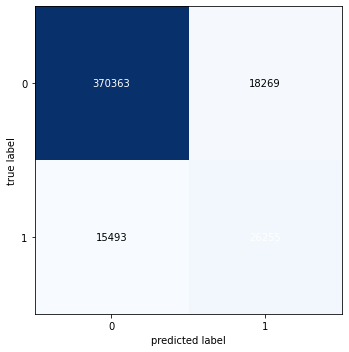

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

y_pred = logisticRegr.predict(X_test)
matriz = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=matriz, figsize=(5,5), show_normed=False)
plt.tight_layout()

In [ ]:
print("LR classification accuracy:", accuracy(y_test, y_pred))

LR classification accuracy: 0.921553046145267


In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.6086563427299703

In [ ]:
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.005, n_iters=500):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        v_w = np.zeros(n_features)
        v_b = 0
        gamma = 0.9
        # gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = np.dot(X.T, (y_predicted - y))
            db = np.sum(y_predicted - y)
            print("dw",dw)
            # momentum
            v_w = gamma * v_w + self.lr * dw 
            v_b = gamma * v_b + self.lr * db
            print("v_w",v_w)
            # update parameters
            self.weights -= v_w
            self.bias -= v_b
            print("weights",self.weights)

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

In [ ]:
def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

In [ ]:
regressor = LogisticRegression(learning_rate=0.005, n_iters=50)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

print("LR classification accuracy:", accuracy(y_test, predictions))

dw [-128837.5        -164868.5         -69120.46073303  -25002.24787933
 -141994.            7534.35719015  -26581.5        -323971.61646729]
v_w [ -644.1875      -824.3425      -345.60230367  -125.0112394
  -709.97          37.67178595  -132.9075     -1619.85808234]
weights [ 644.1875      824.3425      345.60230367  125.0112394   709.97
  -37.67178595  132.9075     1619.85808234]
dw [ 37896.          25383.           5348.           1712.
  10379.          67694.         750351.          53188.60000001]
v_w [ -390.28875     -614.99325     -284.3020733   -103.95011546
  -587.078        372.37460736  3632.13825    -1191.9292741 ]
weights [ 1034.47625     1439.33575      629.90437696   228.96135485
  1297.048       -410.04639331 -3499.23075     2811.78735644]
dw [-244896.78153656 -304412.0010738  -123413.92140625  -43454.09997587
 -241536.78046276 -185816.00993538 -803514.         -631099.16873032]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: overflow encountered in exp



v_w [-1575.74378268 -2075.55393037  -872.941473    -310.82560379
 -1736.05410231  -593.94290306  -748.645575   -4228.23219034]
weights [ 2610.22003268  3514.88968037  1502.84584996   539.78695864
  3033.10210231   183.89650975 -2750.585175    7040.01954678]
dw [   8626.00003358  -19945.          -13633.99996642   -7210.44586769
  -13945.          -82672.1357689  -360037.99996642   53188.60000001]
v_w [-1375.03940425 -1967.72353733  -853.81732553  -315.79527275
 -1632.17369208  -947.9092916  -2473.97101733 -3539.46597131]
weights [ 3985.25943693  5482.6132177   2356.6631755    855.58223139
  4665.2757944   1131.80580135  -276.61415767 10579.48551809]
dw [ 37896.          25383.           5348.           1712.
  10379.         205016.         750351.          53188.60000001]
v_w [-1048.05546382 -1644.0361836   -741.69559298  -275.65574548
 -1417.06132287   171.96163756  1525.1810844  -2919.57637418]
weights [ 5033.31490075  7126.6494013   3098.35876847  1131.23797687
  6082.33711727   9

In [ ]:
print("Pesos:", regressor.weights)
print("Bias:", regressor.bias)

Pesos: [ 0.02267928  0.04697047  0.02281419  0.00846847  0.04752902 -0.13952799
 -0.45308085  0.24035857]
Bias: -1.1091464049827584


In [ ]:
print("Pesos:", regressor.weights)
print("Bias:", regressor.bias)

Pesos: [ 3441.98837302 11390.81359188  8193.86307546  7240.82648305
  8977.16341719 -2876.46384462 -2500.67428876 18506.99442883]
Bias: -3526.469599128031


In [ ]:
import pickle

# guardamos el modelo para ser usado en la aplicación
filename = 'model.pkl'
pickle.dump(regressor, open(filename, 'wb'))

In [ ]:
model = pickle.load(open('model.pkl', 'rb'))

In [ ]:
matriz = confusion_matrix(y_test, predictions)

plot_confusion_matrix(conf_mat=matriz, figsize=(5,5), show_normed=False, cmap=new_inferno)
plt.tight_layout()

NameError: ignored